# **1. Análise Exploratória de Dados:**

### **Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import roc_curve, auc

Com objetivo de importar varias bibliotecas com modulos de dados.

### **Carregador de Dados**

In [3]:
df = pd.read_csv('dataset.csv', delimiter=';')
print(df.head())


   Transaction ID        Date   Time   Card Type Entry Mode  Amount  \
0               1  19/10/2023  05:31  MasterCard        Tap  391.56   
1               2  16/10/2023  12:56  MasterCard        Tap  167.67   
2               3  29/09/2023  07:57  MasterCard        PIN  126.24   
3               4  13/10/2023  00:08  MasterCard        Tap  496.80   
4               5  02/10/2023  23:19  MasterCard        Tap  446.88   

  Transaction Type Merchant Group Transaction Country Shipping Address  \
0              POS       Clothing               Italy    61 Redwood St   
1           Online       Clothing              France      945 Pine St   
2           Online    Electronics               Spain       773 Oak St   
3           Online    Electronics                  UK     436 Maple St   
4              POS        Grocery              France      887 Pine St   

  Billing Address  Gender  Age Issuing Bank Fraudulent  
0    726 Maple St  Female   55     XYZ Bank         No  
1    252 Cedar

Possui o objetivo de ler o arquivo CSV chamado 'dataset.csv' usando a biblioteca pandas em Python.

### **Verificação das colunas**

In [4]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Time', 'Card Type', 'Entry Mode', 'Amount',
       'Transaction Type', 'Merchant Group', 'Transaction Country',
       'Shipping Address', 'Billing Address', 'Gender', 'Age', 'Issuing Bank',
       'Fraudulent'],
      dtype='object')


Exibir os nomes das colunas do DataFrame "df".

### **Verificação de distribuição das classes**

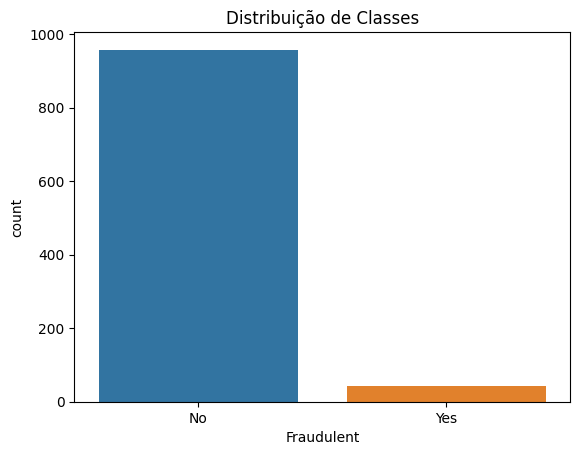

In [5]:
sns.countplot(x='Fraudulent', data=df)
plt.title('Distribuição de Classes')
plt.show()

Esses comandos geram e exibem um gráfico de contagem das classes da variável 'Fraudulent' no DataFrame usando as bibliotecas seaborn e matplotlib.pyplot. O gráfico oferece uma visão rápida da distribuição das classes no conjunto de dados.

### **Identificador de possíveis desequilíbrios**

In [6]:
frauds = df[df['Fraudulent'] == 1]
legitimate = df[df['Fraudulent'] == 0]

Estes comandos criam dois novos DataFrames, frauds e legitimate, que contêm apenas as linhas do DataFrame original onde a coluna 'Fraudulent' é igual a 1 (fraudes) e 0 (não fraudes), respectivamente. Essa separação facilita a análise e manipulação específica de cada classe em conjuntos de dados desbalanceados.

### **Exploração de padrões nos dados**

<ipython-input-7-877988f8955a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


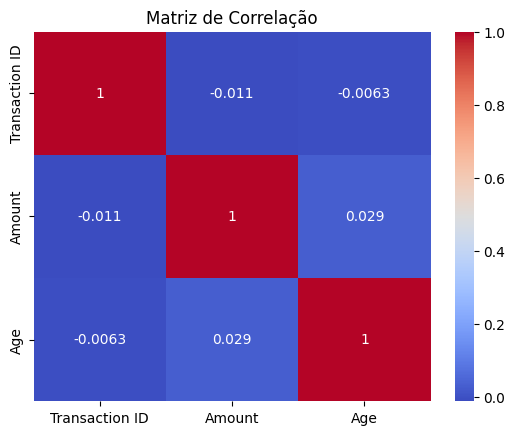

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

 Os comandos geram e exibem um mapa de calor da matriz de correlação das variáveis no DataFrame df. O mapa de calor destaca visualmente as relações de correlação entre as diferentes características do conjunto de dados, proporcionando uma visão rápida dos padrões de associação entre as variáveis.

## **2. Pré-processamento de Dados:**



### **Exibir as colunas categóricas e data a serem tratadas**

In [8]:
categorical_columns = ['Card Type', 'Entry Mode', 'Transaction Type', 'Merchant Group', 'Transaction Country', 'Issuing Bank']
date_columns = ['Date']
time_columns = ['Time']

Criar listas que categorizam as colunas de um DataFrame em diferentes tipos, para facilitar a manipulação e análise específica desses tipos de dados.

### **Divisão dos dados em conjuntos de treinamento, validação e teste**

In [9]:
X = df.drop('Fraudulent', axis=1)
y = df['Fraudulent']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Criação de conjuntos de treinamento, validação e teste a partir de um DataFrame, facilitando a implementação e avaliação de modelos de machine learning.

### **Tratamento de colunas categóricas**

In [10]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

O comando cria um transformador chamado categorical_transformer usando OneHotEncoder para codificar variáveis categóricas com abordagem one-hot, ignorando valores desconhecidos e produzindo uma matriz densa como resultado.

### **Tratamento de colunas não categóricas**

In [11]:
non_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Preencher valores ausentes com a mediana
    ('scaler', StandardScaler())  # Padronizar os valores
])

Com o objetivo de criar um transformador chamado non_categorical_transformer usando uma pipeline do scikit-learn. Ele preenche valores ausentes com a mediana e padroniza as variáveis numéricas.

### **Aplicação de transformações**

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('non_cat', non_categorical_transformer, X_train.select_dtypes(exclude='object').columns)
    ]
)


Possui o objetivo de criar um transformador chamado preprocessor usando ColumnTransformer do scikit-learn. Ele aplica transformações específicas a diferentes conjuntos de colunas em um conjunto de dados.

### **Modelo**

In [13]:
model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)

Possui o objetivo de criar um modelo de classificação baseado em uma MLP com uma camada oculta de 64 neurônios, treinado por até 10 épocas, e garantindo reprodutibilidade ao definir a semente aleatória.

### **Pipeline completo**

In [14]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

Criação de um pipeline no scikit-learn, que é uma maneira de encadear vários passos de processamento de dados e modelagem em um único objeto.

### **Treinamento do modelo**

In [15]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Card Type', 'Entry Mode',
                                                   'Transaction Type',
                                                   'Merchant Group',
                                                   'Transaction Country',
                                                   'Issuing Bank']),
                                                 ('non_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Transaction ID', 'Amount', 'Age'], dtype='object'))])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(64,), max_iter=10,
                               random_state=42))])

Este comando clf.fit(X_train, y_train) é utilizado para treinar o modelo de aprendizado de máquina no conjunto de treinamento fornecido.

### **Avaliação do modelo no conjunto de teste**

In [16]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

O comando y_pred = clf.predict(X_test) é utilizado para fazer previsões das classes para as amostras no conjunto de teste (X_test) usando o modelo treinado (clf). A variável resultante y_pred contém as previsões de classe para cada amostra no conjunto de teste.

### **Métricas de desempenho**

In [17]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nAUC-ROC:", roc_auc_score(y_test, y_pred_proba))

Matriz de Confusão:
[[142   0]
 [  8   0]]

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       142
         Yes       0.00      0.00      0.00         8

    accuracy                           0.95       150
   macro avg       0.47      0.50      0.49       150
weighted avg       0.90      0.95      0.92       150


AUC-ROC: 0.3609154929577465


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Possui o objetivo de fornecer métricas de desempenho detalhadas para avaliar o modelo de classificação.

### **Mapeação 'Yes' para 1 e 'No' para 0**

In [18]:
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
y_pred_proba = clf.predict_proba(X_test)[:, 1]

Possui o objetivo preparar o conjunto de teste para avaliação em um problema de classificação binária. O primeiro comando, y_test_binary = y_test.map({'No': 0, 'Yes': 1}), converte as classes do conjunto de teste de 'No' para 0 e 'Yes' para 1. Isso facilita a comparação direta entre as classes previstas e reais. O segundo comando, y_pred_proba = clf.predict_proba(X_test)[:, 1], obtém as probabilidades previstas para a classe positiva, útil para análises detalhadas da confiança do modelo. Ambos os passos são comuns na avaliação de modelos de classificação binária.

### **Calcular a curva ROC**

In [19]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

Tem o objetivo de calcular as métricas relacionadas à curva ROC (Receiver Operating Characteristic) para avaliar o desempenho de um modelo de classificação binária.

### **Plotar a curva ROC**

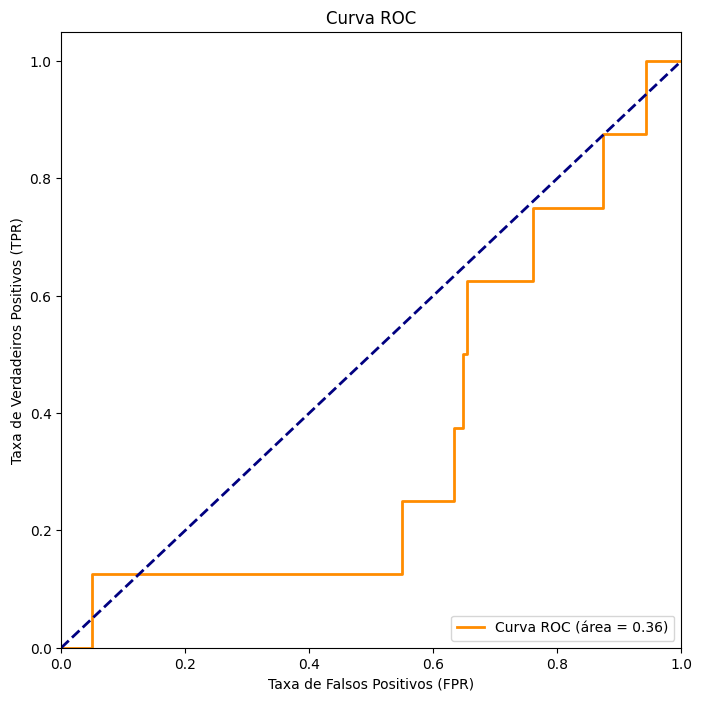

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Tem o objetivo visualizar a curva ROC (Receiver Operating Characteristic) com informações sobre a área sob a curva (AUC-ROC) para avaliar de forma gráfica o desempenho de um modelo de classificação binária.

Esse gráfico fornece uma representação visual do desempenho do modelo, ajudando a avaliar sua capacidade de distinguir entre as classes positivas e negativas em diferentes limiares de decisão.